### Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

### Akses Data dan Membagi data menjadi training dan validation

In [2]:
train = keras.preprocessing.image_dataset_from_directory(
    "DATASET",validation_split=0.2,subset="training",image_size=(120,120),
    batch_size=4,label_mode='categorical',seed=2)

Found 1096 files belonging to 2 classes.
Using 877 files for training.


In [3]:
validate=keras.preprocessing.image_dataset_from_directory(
    "DATASET",validation_split=0.2,subset='validation',image_size=(120,120),
    batch_size=4,label_mode='categorical',seed=2)

Found 1096 files belonging to 2 classes.
Using 219 files for validation.


### Lihat Kelas pada Dataset & Kelas dari gambar pada train

In [4]:
class_names= train.class_names
class_names

['WithMask', 'WithoutMask']

In [5]:
labels = []
for _, label in train:
    labels = np.concatenate((labels, np.argmax(label, axis=-1)))

### Menampilkan contoh pada data train

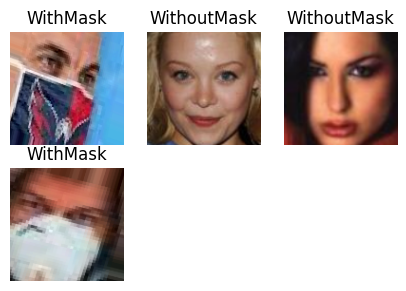

In [6]:
plt.figure(figsize=(5, 5))
for images, labels in train.take(1):
    for i in range(4):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
plt.show()

### Membuat Model & Model Summary

In [7]:
model = keras.Sequential()
model.add(Flatten(input_shape = (120,120,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43200)             0         
                                                                 
 dense (Dense)               (None, 128)               5529728   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,540,130
Trainable params: 5,540,130
Non-trainable params: 0
_________________________________________________________________


### Compile & Fit Model

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',
metrics=['accuracy'])

In [9]:
history=model.fit(train,epochs=5,validation_data=validate)

Epoch 1/5
220/220 [==============================] - 7s 27ms/step - loss: 207.6354 - accuracy: 0.7195 - val_loss: 135.9830 - val_accuracy: 0.7580
Epoch 2/5
220/220 [==============================] - 6s 26ms/step - loss: 99.7183 - accuracy: 0.7811 - val_loss: 29.2608 - val_accuracy: 0.8493
Epoch 3/5
220/220 [==============================] - 6s 26ms/step - loss: 35.8235 - accuracy: 0.8369 - val_loss: 30.5567 - val_accuracy: 0.8402
Epoch 4/5
220/220 [==============================] - 6s 26ms/step - loss: 16.1413 - accuracy: 0.8518 - val_loss: 54.1752 - val_accuracy: 0.7991
Epoch 5/5
220/220 [==============================] - 6s 26ms/step - loss: 22.1520 - accuracy: 0.8563 - val_loss: 11.7520 - val_accuracy: 0.8584


### Melihat Visualisasi Akurasi Dan Loss

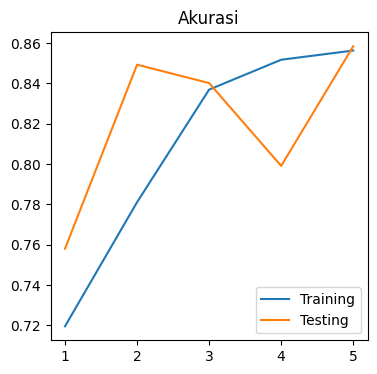

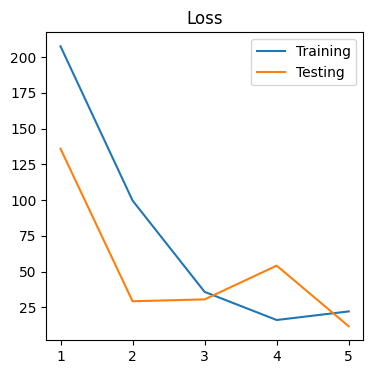

In [10]:
history.history.keys()
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.plot([i+1 for i in range(5)],history.history["accuracy"],label='Training')
plt.plot([i+1 for i in range(5)],history.history["val_accuracy"],label='Testing')
plt.title("Akurasi")
plt.legend()
plt.show()

plt.figure(figsize=(9,4))
plt.subplot(1,2,2)
plt.plot([i+1 for i in range(5)],history.history["loss"],label='Training')
plt.plot([i+1 for i in range(5)],history.history["val_loss"],label='Testing')
plt.title("Loss")
plt.legend()

plt.show()